# Trabalhando com Planilhas
A seguir, veremos como aplicar os conceitos mostrados aqui em uma base de dados "real", cujos atribuots estão armazenados em um arquivo do tipo CSV.

## Importando as bibliotecas
Vamos começar com as bibliotecas `numpy` e `pandas`. Como já dito, `numpy` é uma biblioteca de criação e manipulação de arrays; já a `pandas` é uma biblioteca de criação e manipulação de *dataframes*.

In [1]:
import numpy as np
import pandas as pd

## Importação o dataset
Nesta etapa, utilizaremos o método `read_csv` do `pandas` para ler os dados que estão no formato CSV. Os dados estão em uma URL, mas poderiam ter sido carregados localmente (usando funções específicas).

In [2]:
dataset=pd.read_csv('./Salary_Data.csv')
#dataset = pd.read_csv("http://www.facom.ufu.br/~phrg/dados/Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


A base de dados que vamos utilizar é um conjunto de dados com as informações de salário e tempo de trabalho de 30 funcionários de uma empresa fictícia.

O nosso objetivo é construir um modelo de regressão linear que, uma vez dado o tempo de empresa de um funcionário, prevê qual o salário desse mesmo funcionário.

Além da importação dos dados, precisamos, também, dividir os dados em variável independente ($X$) e dependente ($y$).

In [4]:
# Anos de experiência
X = dataset.iloc[:,:-1].values

# Salário
y = dataset.iloc[:,-1].values

In [5]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [6]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## Separando em dataset de treinamento e teste
Uma etapa essencial do aprendizado de máquina como um todo é a separação dos dados em dois grupos: dados de treinamento e dados de teste. Precisamos separar nosso conjunto de dados de forma que os dados de treinamento sejam usados para construir o modelo e os dados de teste para verificar o desempenho (*performance*) do modelo.
> **Observação:** Note que o termo "construir" o modelo, no jargão do aprendizado de máquina, é o mesmo que "treinar" o modelo.

A biblioteca do `sckitlearn` oferece uma função, `train_test_split`, que permite essa separação.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

Aqui, optamos por um conjunto de teste composto por 20% da base de dados (parâmetro `test_size`). Assim, as variáveis `X_train` e `y_train` (de treinamento) armazenarão 80% dos dados, enquanto `X_test` e `y_test` terão os 20% dos dados de teste. A função `train_test_split` faz essa divisão de maneira aleatória, como forma de evitar enviesar o conjunto; nesse caso, parâmtro `random_state` define a "semente" (*seed*) do gerador de números aleatórios usados pela função.

No nosso exemplo, atribuímos um valor fixo (no caso, `0`) ao parâmtro `random_state`. Isso significa que, toda vez que executarmos a função, o gerador criará a mesma sequência de números aleatórios, permitindo a reprodução dos resultados. Caso não passássemos um valor para esse, cada execução do método `train_test_split` usaria uma semente nova e, portanto, os resultados poderiam ser distindos a cada execução.

## Treinando o modelo de Regressão Linear
Vamos, agora, construir (ou treinar) o nosso modelo. Observe que, nesse exemplo, não precisamos nos preocupar com dados categóricos, dados ausentes ou com a normalização dos dados. Nossos dados já estão no formato adequado, bastando instanciar a classe `LinearRegression` e treiná-la com `X_train` e `y_train` usando o método `fit`.

In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Prevendo os resultados do teste
Depois de criarmos o modelo, devemos testá-lo. Para isso, vamos utilizar o nosso conjunto de dados de teste (ou seja, os 20% de dados previamoente separados).

Utilizaremos o método `predict` do `scikitlearn` para determinar o resultado para o conjunto `X_test`.

In [9]:
y_pred = regressor.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

O primeiro termo da variável `y_pred` é 40748,96. Isso significa que, segundo o modelo, que o salário de uma pessoa que está há 1,5 ano na empresa é de 40.748,96. Lembrando que 1,5 é o primeiro termo de `X_test`. Faça essa análise para os demais termos!

Idealmente, o resultado de `y_pred` deveria ser igual (ou, ao menos, muito próximo) de `y_test`. Vamos fazer esa comparação, mas de maneira visual.

## Visualizando os resultados
Uma forma interessante de verificar os resultados do modelo é através da criação de um gráfico. Dessa forma, podemos visualizar melhor como o modelo se acomodou aos dados de treinamento e também como ele se compara com os dados de teste. Para isso, utilizaremos a biblioteca `matplotlib` para fazer gráficos.

Primeiro vamos visualizar os dados de treinamento.

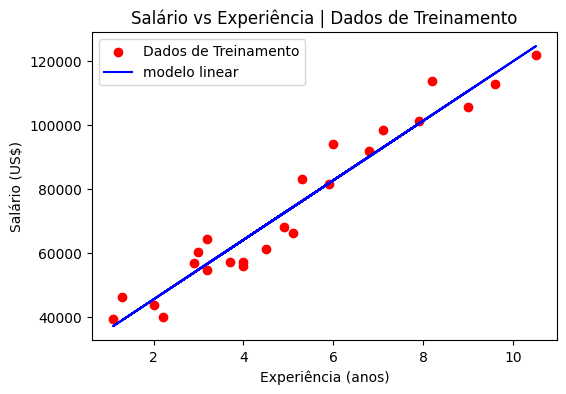

In [10]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1,1,figsize=(6,4))

ax.scatter(X_train, y_train, color='red', label='Dados de Treinamento')
ax.plot(X_train, regressor.predict(X_train), color='blue',label = 'modelo linear')
ax.set(title ='Salário vs Experiência | Dados de Treinamento',
        xlabel= "Experiência (anos)",
        ylabel = "Salário (US$)");
ax.legend()

Observe que a reta se aproximou dos dados de treinamento. Ainda, em alguns casos, ficou bem próximo dos valores reais.

Vamos fazer o mesmo agora como os dados de teste, ou seja, vamos comparar o modelo visualmente.

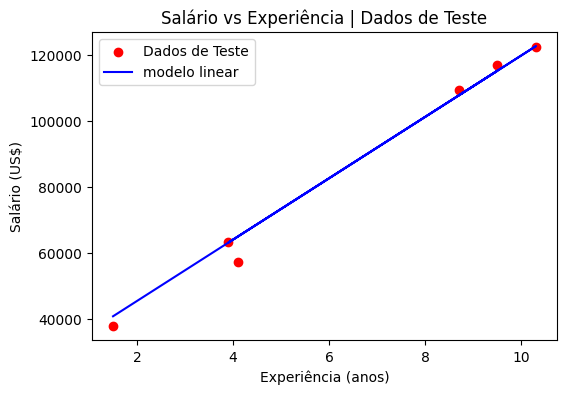

In [11]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.scatter(X_test, y_test, color='red', label='Dados de Teste')
ax.plot(X_test, regressor.predict(X_test), color='blue', label='modelo linear')
ax.set(title ='Salário vs Experiência | Dados de Teste',
        xlabel= "Experiência (anos)",
        ylabel = "Salário (US$)");
ax.legend()

Assim como na figura anterior, a reta se adequou bem aos dados, não havendo muita distância entre o modelo e os dados de teste. Isso indica que a regressão linear modelou bem o comportamento das variáveis Salário e Tempo de Empresa.

Obviamente, não podemos confirar numa análise visual, pois podemos ter conjuntos muiot grandes de dados, o que inviabiliza a visualização. Por isso, vamos voltar às técnicas de validação vistas em aula.

## Analisando o desempenho do modelo
Novamente, vamos utilizar a métrica $R^2$ (o coeficiente de determinação) para validarmos nosso modelo.

Faremos isso para o conjunto de dado de treinamento, ou seja, `X_train` e `y_train`:

In [12]:
r_sq = regressor.score(X_train, y_train)
print(f"coeficiente de determinacao: {r_sq}")

coeficiente de determinacao: 0.9411949620562126


O valor (aproximadamente 0.94) é relativamente alto, indicando um bom ajuste do modelo.

Porém, ainda existem outras formas de validar um modelo de regressão linear. Uma delas é o erro quadrático médio ou, mais especificamente, a a raiz quadrada do erro quadrático médio (RMSE, do inglês *root mean square deviation*). Trata-se da diferença entre o valor que foi previsto pelo nosso modelo e o valor real que foi observado.

Em Python, o cálculo do erro quadrático médio está implementado no próprio `sklearn`, conforme mostrado a seguir. Vamos usar também o módulo `math`, para cálculo da raiz quadrada).

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

3580.979237321343

Falando de uma maneira mais informal, o valor obtido indica que a diferença média entre o salário real e o salário previso é de cerca de 3581 dólares. Isso pode ser muito ou pouco, depende do conjunto de dados que estamos lidando. No nosso caso, como estamos trabalhando na ordem de dezenas de milhares, pode ser considerado um valor relativamente baixo.

Ainda assim, pode ser considerada uma análise subjetiva. Portanto, sempre use diferentes métricas!

# Exercícios
1. Refaça o exemplo, mas sem fazeer a separação dos dados em treinamento e teste. Ou seja, considere todos os dados como treinamento e avalie o quanto isso impacta na métrica $R^2$. Em seguida, crie dados "fictícios" para fazer as previsões.
2. Utilize outra base de dados e refaça esse exemplo. Pode considerar um arquivo CSV ou, ainda, utilizar *datasets* disponíveis na biblioteca `sklearn`. Para ver a relação de *datasets*, clique [aqui](https://scikit-learn.org/stable/datasets.html).